In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris

### IRIS Dataset:
This Dataset is based on flowers and classify the flowers on basis of their petal length, petal width, sepal width,sepal length.

In [3]:
iris = load_iris()

In [4]:
dataset = pd.DataFrame(iris['data'],columns=iris['feature_names'])

In [5]:
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
dataset.describe()
#No need for scaling the data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Defining X and Y

In [8]:
X = dataset.iloc[:, :-1].values
Y = iris.target # dependent variable i.e the type/species of flower

In [9]:
X.shape

(150, 3)

In [10]:
Y.shape

(150,)

In [11]:
#Splitting the data in train and test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [12]:
#Scaling the data
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_train =scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)


#Without scaling , its accuracy is more

In [13]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)#k=5 default
classifier.fit(X_train ,Y_train)

KNeighborsClassifier()

In [14]:
Y_pred = classifier.predict(X_test)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))
print("Accuracy is: ",accuracy_score(Y_test , Y_pred))

[[ 9  0  0]
 [ 0  7  2]
 [ 0  1 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.88      0.78      0.82         9
           2       0.85      0.92      0.88        12

    accuracy                           0.90        30
   macro avg       0.91      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30

Accuracy is:  0.9


In [16]:
error = []

#calculating error for k values between 1 and 40

for i in range(    1 ,40,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != Y_test))
    

Text(0, 0.5, 'Mean Error')

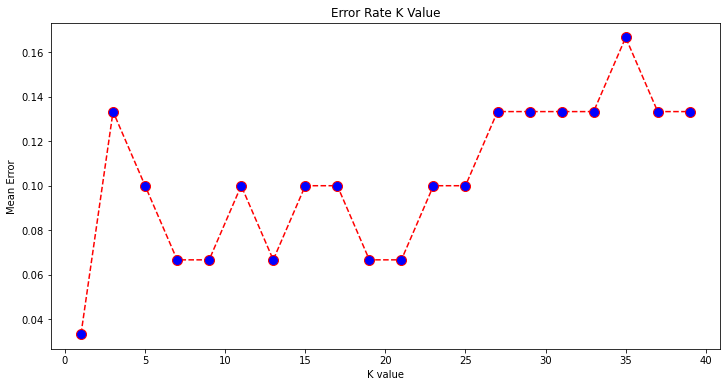

In [17]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40,2),error,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K value')
plt.ylabel('Mean Error')

In [21]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=11)#as n= 150, so k=sqrt(n) should be odd 
classifier.fit(X_train ,Y_train)

KNeighborsClassifier(n_neighbors=11)

In [22]:
Y_pred1 = classifier.predict(X_test)

In [23]:
print(confusion_matrix(Y_test,Y_pred1))

[[ 9  0  0]
 [ 0  7  2]
 [ 0  1 11]]


In [24]:
print("Accuracy is: ",accuracy_score(Y_test , Y_pred))

Accuracy is:  0.9
